# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


In [20]:
weather_api_key

'69257ee1086fc72bd50ce295f7a433a6'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salahonda
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | vanimo
Processing Record 4 of Set 1 | tobi village
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | tekeli
Processing Record 9 of Set 1 | mahasamund
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | cukurca
Processing Record 12 of Set 1 | kapuskasing
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | mae hong son
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | kerikeri
Processing Record 20 of Set 1 | utrik
Processing Record 21 of S

Processing Record 38 of Set 4 | singarayakonda
Processing Record 39 of Set 4 | kapa'a
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | puerto lempira
Processing Record 42 of Set 4 | valparaiso
Processing Record 43 of Set 4 | gadzhiyevo
Processing Record 44 of Set 4 | daru
Processing Record 45 of Set 4 | taupo
Processing Record 46 of Set 4 | uturoa
Processing Record 47 of Set 4 | kourou
Processing Record 48 of Set 4 | fale old settlement
Processing Record 49 of Set 4 | sisimiut
Processing Record 0 of Set 5 | saint-pierre
Processing Record 1 of Set 5 | brookings
Processing Record 2 of Set 5 | ranohira
City not found. Skipping...
Processing Record 3 of Set 5 | al 'aziziyah
Processing Record 4 of Set 5 | sidi bennour
Processing Record 5 of Set 5 | pokaran
Processing Record 6 of Set 5 | takamaka
City not found. Skipping...
Processing Record 7 of Set 5 | fort bragg
Processing Record 8 of Set 5 | yerofey pavlovich
Processing Record 9 of Set 5 | doume
Processing R

Processing Record 26 of Set 8 | ostroleka
Processing Record 27 of Set 8 | la ronge
Processing Record 28 of Set 8 | alesund
Processing Record 29 of Set 8 | kuta
Processing Record 30 of Set 8 | sos'va
Processing Record 31 of Set 8 | kulia village
City not found. Skipping...
Processing Record 32 of Set 8 | oualidia
City not found. Skipping...
Processing Record 33 of Set 8 | antalaha
Processing Record 34 of Set 8 | alenquer
Processing Record 35 of Set 8 | kenai
Processing Record 36 of Set 8 | hutchinson
Processing Record 37 of Set 8 | tres palos
Processing Record 38 of Set 8 | torres
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | yaren
Processing Record 41 of Set 8 | kristiansund
Processing Record 42 of Set 8 | nasiriyah
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | koneurgench
City not found. Skipping...
Processing Record 45 of Set 8 | fisterra
Processing Record 46 of Set 8 | kununurra
Processing Record 47 of Set 8 | greenville
Processing Re

Processing Record 14 of Set 12 | prabumulih
Processing Record 15 of Set 12 | camocim
Processing Record 16 of Set 12 | black point
Processing Record 17 of Set 12 | usinsk
Processing Record 18 of Set 12 | devils lake
Processing Record 19 of Set 12 | nasice
Processing Record 20 of Set 12 | sola
Processing Record 21 of Set 12 | wotho
Processing Record 22 of Set 12 | la mira
Processing Record 23 of Set 12 | mournies
Processing Record 24 of Set 12 | kish
Processing Record 25 of Set 12 | preobrazheniye
Processing Record 26 of Set 12 | nova vicosa
Processing Record 27 of Set 12 | blair
Processing Record 28 of Set 12 | malango
Processing Record 29 of Set 12 | san pedro
Processing Record 30 of Set 12 | igarka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salahonda,2.1019,-78.7217,26.28,81,78,4.71,CO,1699236602
1,vanimo,-2.6741,141.3028,28.41,80,98,0.41,PG,1699236603
2,port-aux-francais,-49.3500,70.2167,2.84,76,94,14.78,TF,1699236603
3,edinburgh of the seven seas,-37.0676,-12.3116,13.24,76,100,5.89,SH,1699236604
4,tiksi,71.6872,128.8694,-25.05,99,42,2.29,RU,1699236604


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salahonda,2.1019,-78.7217,26.28,81,78,4.71,CO,1699236602
1,vanimo,-2.6741,141.3028,28.41,80,98,0.41,PG,1699236603
2,port-aux-francais,-49.3500,70.2167,2.84,76,94,14.78,TF,1699236603
3,edinburgh of the seven seas,-37.0676,-12.3116,13.24,76,100,5.89,SH,1699236604
4,tiksi,71.6872,128.8694,-25.05,99,42,2.29,RU,1699236604


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

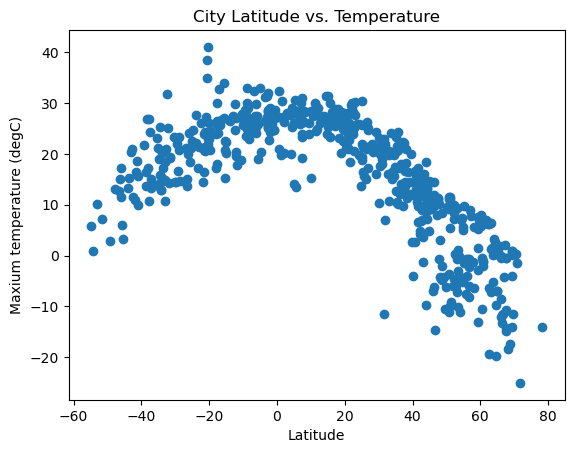

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Maxium temperature (degC)')
plt.title('City Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

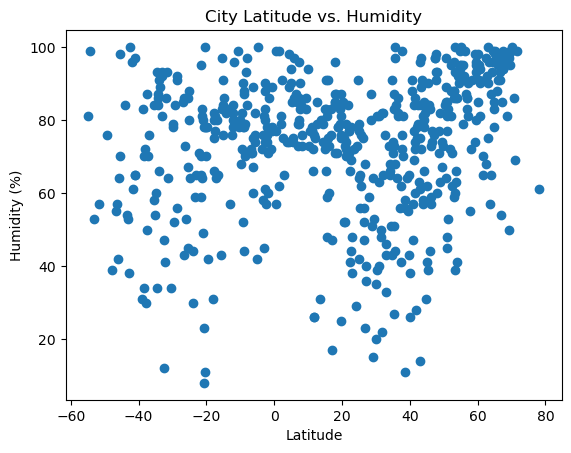

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

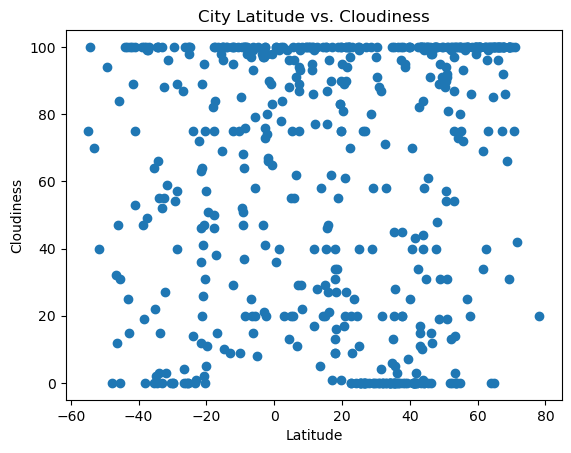

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

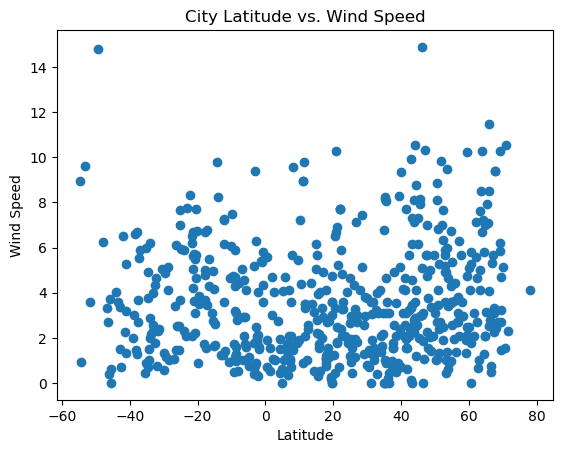

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, y_label, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.scatter(x, y)
    plt.plot(x, regress_value, 'r-')
    plt.annotate(line_eq, text_coord, fontsize=15, color='red')
    plt.xlabel('Lat')
    plt.ylabel(y_label)
    print(f'The r2-value is {round(rvalue**2,3)}')
    plt.show()

    

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salahonda,2.1019,-78.7217,26.28,81,78,4.71,CO,1699236602
4,tiksi,71.6872,128.8694,-25.05,99,42,2.29,RU,1699236604
5,tekeli,44.8300,78.8239,4.85,31,31,2.55,KZ,1699236605
6,mahasamund,21.1000,82.1000,21.15,72,27,1.82,IN,1699236605
8,cukurca,37.2481,43.6136,9.75,56,0,0.80,TR,1699236607


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vanimo,-2.6741,141.3028,28.41,80,98,0.41,PG,1699236603
2,port-aux-francais,-49.3500,70.2167,2.84,76,94,14.78,TF,1699236603
3,edinburgh of the seven seas,-37.0676,-12.3116,13.24,76,100,5.89,SH,1699236604
7,port alfred,-33.5906,26.8910,17.22,89,15,2.16,ZA,1699236597
10,blackmans bay,-43.0167,147.3167,20.29,53,25,3.38,AU,1699236608


###  Temperature vs. Latitude Linear Regression Plot

The r2-value is 0.754


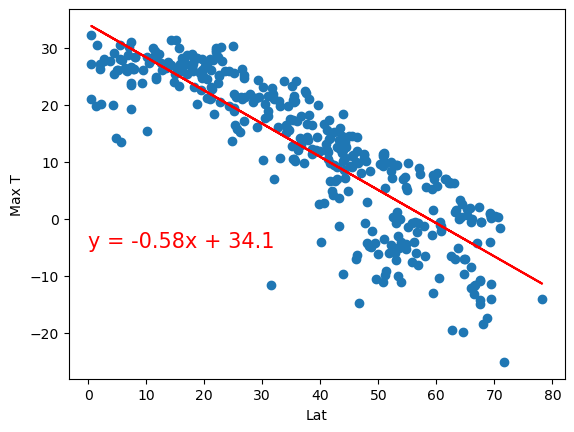

In [47]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max T', (0,-5))

The r2-value is 0.52


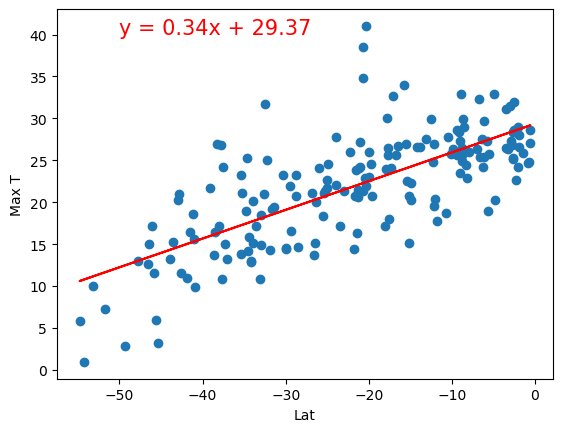

In [67]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max T', (-50,40))

**Discussion about the linear relationship:** Strong correlation (r2=0.754) is confirmed between the latitude and the maximum temperature in the northern hemisphere. Lesser correlation, but still moderate in its sifnificance, is found in the southern hemisphere. In general, when we approach the equator, the temperature increases (and vice versa).

### Humidity vs. Latitude Linear Regression Plot

The r2-value is 0.052


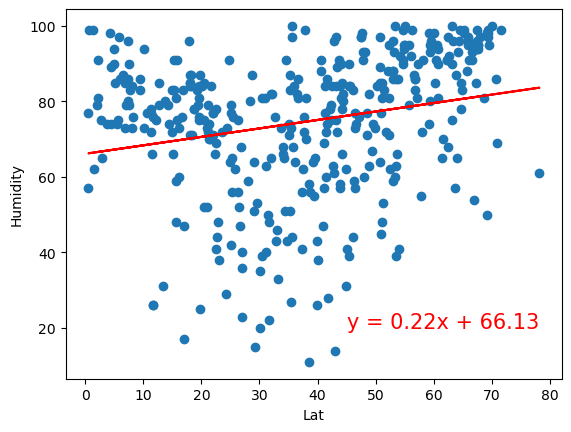

In [71]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (45,20))

The r2-value is 0.028


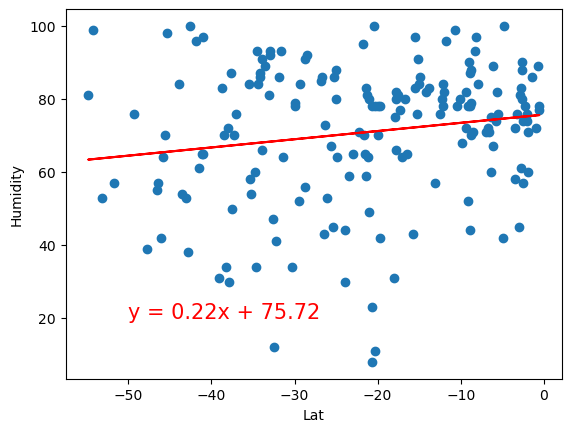

In [73]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-50,20))

**Discussion about the linear relationship:** For both hemispheres, the r2-value is very close to zero when relating the latitude to the humidity. No correlation was confirmed.

### Cloudiness vs. Latitude Linear Regression Plot

The r2-value is 0.03


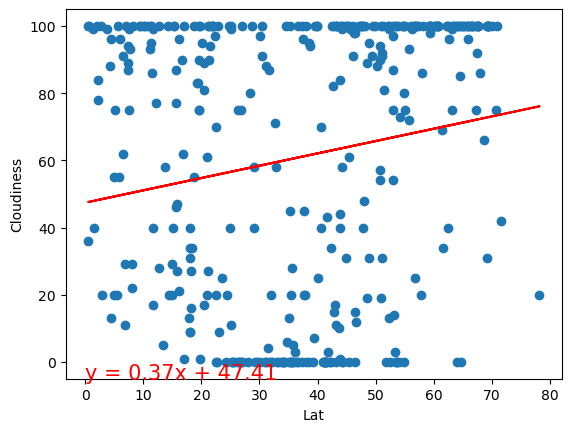

In [74]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (0,-5))

The r2-value is 0.029


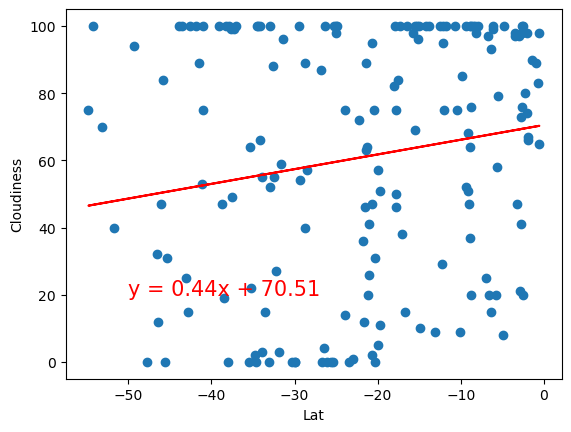

In [75]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-50,20))

**Discussion about the linear relationship:** Cloudiness does not correlate with the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r2-value is 0.059


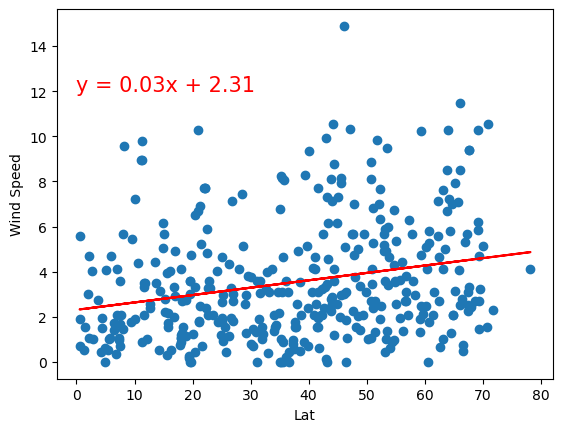

In [77]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (0,12))

The r2-value is 0.008


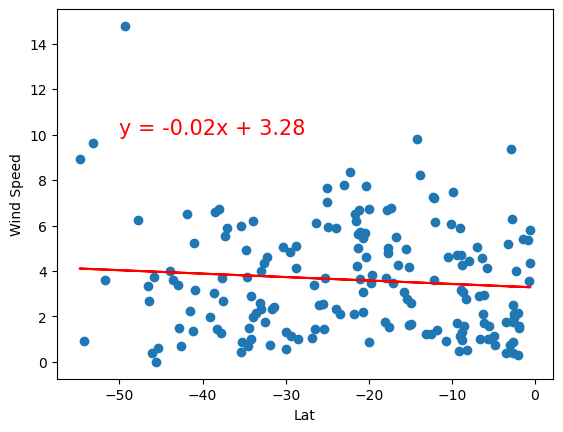

In [79]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50,10))

**Discussion about the linear relationship:** Wind speed does not reveal correlation with the latitude.